# Preprocessing

In [18]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import os


## Inspect Data

In [19]:
directory = os.getcwd()

In [20]:
data = pd.read_csv('patientdata.csv', na_values=["na", "--", "unknown"], index_col='patient_id')
data


,age_yrs,gender,weight_kg,height_cm,diabetes,heart_disease,lung_disease,city
patient_id,,,,,,,,
pat0001,75.0,male,54.12,152.34,yes,no,yes,Kassel
pat0002,48.0,female,72.70,185.56,no,yes,yes,NaN
pat0003,23.0,f,NaN,182.78,yes,yes,yes,NaN
pat0004,96.0,m,41.28,161.29,yes,no,NaN,Marburg
pat0005,82.0,99,35.68,143.37,no,yes,no,NaN
...,...,...,...,...,...,...,...,...
pat0096,81.0,NaN,67.42,175.55,yes,no,yes,NaN
pat0097,25.0,male,91.04,150.16,no,yes,no,NaN
pat0098,29.0,female,59.43,173.58,NaN,yes,yes,NaN


<AxesSubplot:>

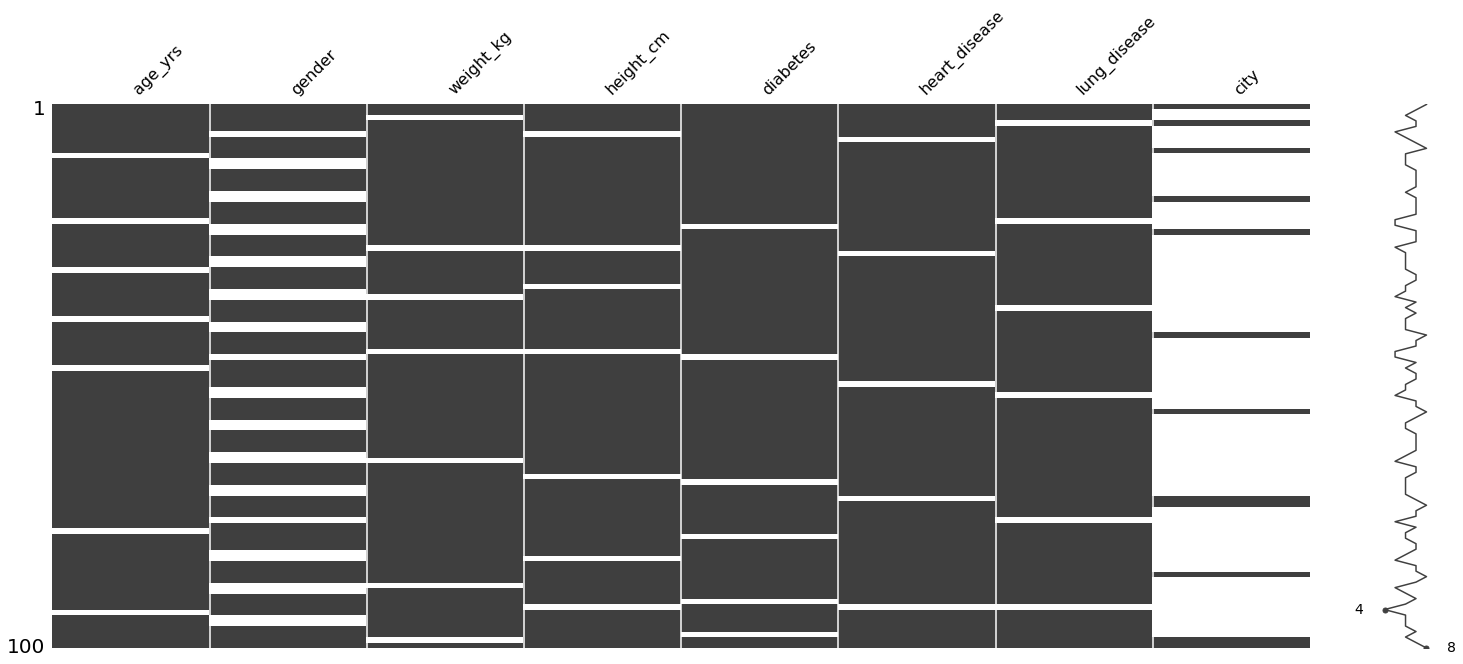

In [21]:
msno.matrix(data)


## Handling Missing Data

<AxesSubplot:>

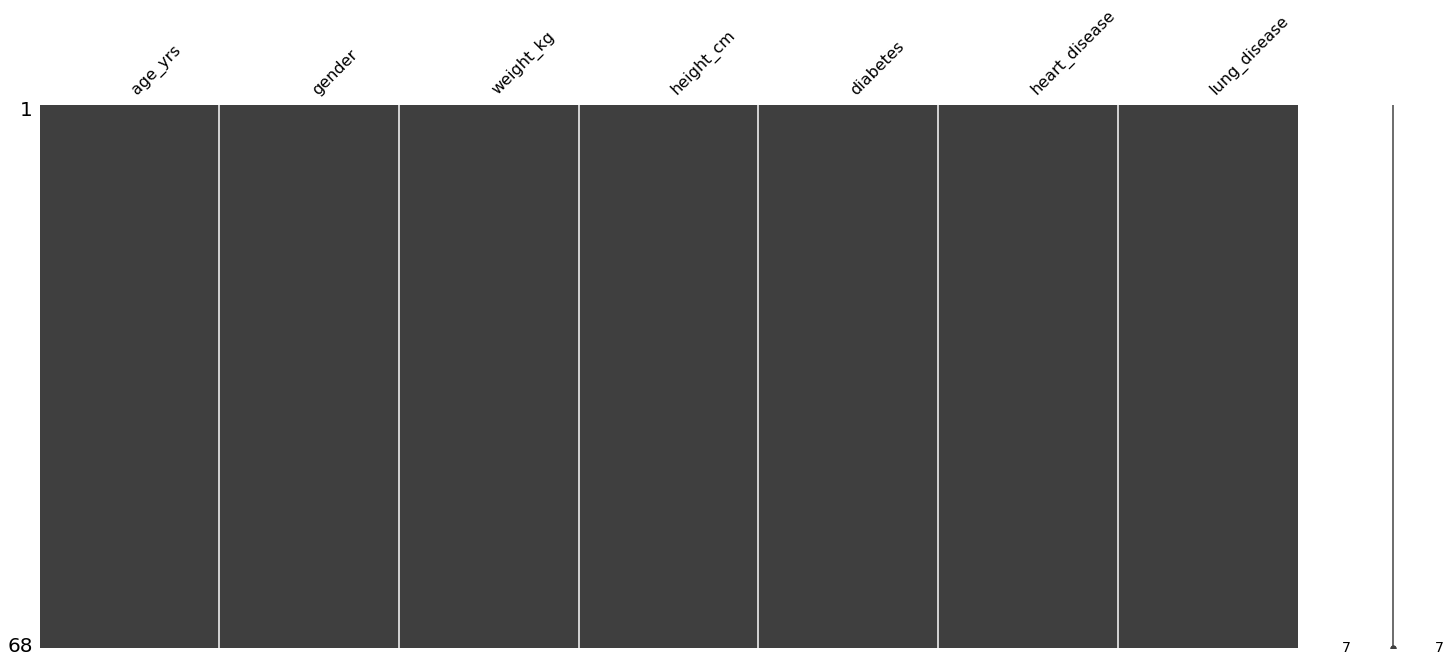

In [22]:

def missing_mean(column_name, missing_data):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    missing_data[column_name] = imp_mean.fit_transform(missing_data[column_name].values.reshape(-1, 1)).astype(int)

def missing_constant(constant, column_name, missing_data):
    imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=constant)
    missing_data[column_name] = imp_constant.fit_transform(missing_data[column_name].values.reshape(-1, 1))

# city
data = data.drop('city', axis=1)

# gender 
data = data.replace({'gender': {'male': 'm', 'female': 'f'}})
data = data[(data['gender'] == 'm') | (data['gender'] == 'f')]

# age_yrs
missing_mean('age_yrs', data)

# weight_kg
missing_mean('weight_kg', data)

# height_cm
missing_mean('height_cm', data)

# diabetes
missing_constant('no', 'diabetes', data)

# heart_disease
missing_constant('no', 'heart_disease', data)

# lung_disease
missing_constant('no', 'lung_disease', data)

msno.matrix(data)


## OneHotEncoder

In [23]:

def encode_strings(column_name, data):    
    label_encoder = LabelEncoder()
    data[column_name] = label_encoder.fit_transform(data[column_name])

# gender
encode_strings('gender', data)    

# diabetes
encode_strings('diabetes', data)

# heart_disease
encode_strings('heart_disease', data)

# lung_disease
encode_strings('lung_disease', data)

data


,age_yrs,gender,weight_kg,height_cm,diabetes,heart_disease,lung_disease
patient_id,,,,,,,
pat0001,75,1,54,152,1,0,1
pat0002,48,0,72,185,0,1,1
pat0003,23,0,78,182,1,1,1
pat0004,96,1,41,161,1,0,0
pat0007,90,1,81,149,0,0,0
...,...,...,...,...,...,...,...
pat0094,56,1,65,183,1,0,0
pat0097,25,1,91,150,0,1,0
pat0098,29,0,59,173,0,1,1


## Scaling

In [24]:
data_scaled = preprocessing.scale(data)
df = pd.DataFrame(data_scaled, 
        index=data.index,
        columns=data.columns)
df

,age_yrs,gender,weight_kg,height_cm,diabetes,heart_disease,lung_disease
patient_id,,,,,,,
pat0001,0.761453,1.0,-0.918147,-0.719213,0.836660,-1.060660,1.092496
pat0002,-0.360559,-1.0,-0.243185,1.759918,-1.195229,0.942809,1.092496
pat0003,-1.399460,-1.0,-0.018198,1.534542,0.836660,0.942809,1.092496
pat0004,1.634129,1.0,-1.405620,-0.043087,0.836660,-1.060660,-0.915335
pat0007,1.384793,1.0,0.094296,-0.944589,-1.195229,-1.060660,-0.915335
...,...,...,...,...,...,...,...
pat0094,-0.028111,1.0,-0.505670,1.609668,0.836660,-1.060660,-0.915335
pat0097,-1.316348,1.0,0.469275,-0.869464,-1.195229,0.942809,-0.915335
pat0098,-1.150124,-1.0,-0.730658,0.858416,-1.195229,0.942809,1.092496


## Export to Excel

In [25]:
df.to_excel('patients.xlsx')